# Test Fitbit API

Following https://www.kdnuggets.com/2020/02/using-fitbit-web-api-python.html

In [8]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
#!pip install git+git://github.com/orcasgit/python-fitbit.git
import fitbit

# gather_keys_oauth2.py file needs to be in the same directory. 
# !curl -O https://raw.githubusercontent.com/orcasgit/python-fitbit/master/gather_keys_oauth2.py
# also needs to install cherrypy: https://pypi.org/project/CherryPy/
# !pip install CherryPy
import gather_keys_oauth2 as Oauth2
import pandas as pd f
import datetime

from dotenv import load_dotenv
load_dotenv

# read from env variables in .env after registering application with Fitbit
CLIENT_ID=os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')f

In [10]:
# Authorization
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

[06/Nov/2020:17:25:36] ENGINE Listening for SIGTERM.
[06/Nov/2020:17:25:36] ENGINE Listening for SIGHUP.
[06/Nov/2020:17:25:36] ENGINE Listening for SIGUSR1.
[06/Nov/2020:17:25:36] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[06/Nov/2020:17:25:36] ENGINE Started monitor thread 'Autoreloader'.
[06/Nov/2020:17:25:36] ENGINE Serving on http://127.0.0.1:8080
[06/Nov/2020:17:25:36] ENGINE Bus STARTED


127.0.0.1 - - [06/Nov/2020:17:26:02] "GET /?code=239bc6b36a48a5690ad4e366d5f0c2d7e147535f&state=XwJ1odxhiysdP1peY32QjaZW1vfymJ HTTP/1.1" 200 122 "" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
127.0.0.1 - - [06/Nov/2020:17:26:02] "GET /favicon.ico HTTP/1.1" 200 1406 "http://127.0.0.1:8080/?code=239bc6b36a48a5690ad4e366d5f0c2d7e147535f&state=XwJ1odxhiysdP1peY32QjaZW1vfymJ" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"


[06/Nov/2020:17:26:03] ENGINE Bus STOPPING
[06/Nov/2020:17:26:03] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[06/Nov/2020:17:26:03] ENGINE Stopped thread 'Autoreloader'.
[06/Nov/2020:17:26:03] ENGINE Bus STOPPED
[06/Nov/2020:17:26:03] ENGINE Bus EXITING
[06/Nov/2020:17:26:03] ENGINE Bus EXITED
[06/Nov/2020:17:26:03] ENGINE Waiting for child threads to terminate...


## Look at one day of data

In [11]:
one_date = pd.datetime(year = 2020, month = 9, day = 1)

<ipython-input-11-d4dd3aa9f7b4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  one_date = pd.datetime(year = 2020, month = 9, day = 1)


In [12]:
one_day_data = auth2_client.intraday_time_series('activities/heart',
                                                 base_date=one_date,
                                                 detail_level='1sec')

In [13]:
one_day_data 

{'activities-heart': [{'dateTime': '2020-09-01',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 1435.9248,
      'max': 91,
      'min': 30,
      'minutes': 1136,
      'name': 'Out of Range'},
     {'caloriesOut': 529.0032,
      'max': 127,
      'min': 91,
      'minutes': 210,
      'name': 'Fat Burn'},
     {'caloriesOut': 39.216,
      'max': 154,
      'min': 127,
      'minutes': 6,
      'name': 'Cardio'},
     {'caloriesOut': 0, 'max': 220, 'min': 154, 'minutes': 0, 'name': 'Peak'}],
    'restingHeartRate': 71}}],
 'activities-heart-intraday': {'dataset': [{'time': '00:00:01', 'value': 92},
   {'time': '00:00:06', 'value': 92},
   {'time': '00:00:21', 'value': 91},
   {'time': '00:00:26', 'value': 88},
   {'time': '00:00:31', 'value': 85},
   {'time': '00:00:36', 'value': 82},
   {'time': '00:00:41', 'value': 79},
   {'time': '00:00:46', 'value': 76},
   {'time': '00:00:51', 'value': 73},
   {'time': '00:00:56', 'value': 70},
   {'time': '00:

In [14]:
df = pd.DataFrame(one_day_data['activities-heart-intraday']['dataset'])

In [15]:
df.head()

,time,value
0,00:00:01,92
1,00:00:06,92
2,00:00:21,91
3,00:00:26,88
4,00:00:31,85


<AxesSubplot:xlabel='time'>

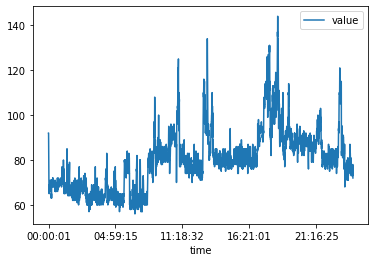

In [18]:
df.plot(x='time', y='value')